In [3]:
import os
os.chdir("..")

import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [9]:
trial = "keySize_linear_1_10_suite_1_var"
df, spec = dataset.load(bucket="perfd", 
                  app_name="memcached",
                  trial=trial)
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("keySize"))

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,keySize,valueSize,serverThread,clientThread,runTime,waitTime,warmupTime,debug,avg_lat_read,std_lat_read,min_lat_read,99th_lat_read,rx_goodput,tx_goodput,avg_client_server_lat,tenancy
0,0,0,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,63.9,13.4,54.8,73.1,0.0,0.2,91.0,default
19,19,19,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,176.8,18.9,156.2,207.1,0.0,0.1,197.0,default
18,18,18,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,68.0,11.4,54.8,81.2,0.0,0.2,118.0,default
17,17,17,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,54.0,10.5,41.1,63.1,0.1,0.2,90.0,default
16,16,16,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,173.5,14.1,156.2,204.4,0.0,0.1,200.0,default
15,15,15,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,63.7,22.6,49.8,75.2,0.0,0.2,106.0,default
13,13,13,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,66.0,10.6,54.8,79.0,0.0,0.2,96.0,default
12,12,12,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,158.3,27.7,142.0,208.4,0.0,0.1,194.0,default
11,11,11,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,63.7,11.5,49.8,77.5,0.0,0.2,98.0,default
10,10,10,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,160.1,11.1,142.0,188.5,0.0,0.1,223.0,default


hyptertune: start tuning..
(99, 1) (99,)
Search took 1.33 seconds parameter settings.
Model with rank: 1
Mean validation score: -1.033 (std: 0.025)
Parameters: {'fit_intercept': False, 'normalize': True}

[('linear_regression', {'fit_intercept': False, 'normalize': True})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 1) (99,)
Search took 1.17 seconds parameter settings.
Model with rank: 1
Mean validation score: -1.059 (std: 0.038)
Parameters: {'algorithm': 'auto', 'n_neighbors': 32, 'weights': 'uniform'}

[('nearest_neighbors', {'algorithm': 'auto', 'n_neighbors': 32, 'weights': 'uniform'})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 1) (99,)
Search took 5.52 seconds parameter settings.
Model with rank: 1
Mean validation score: -1.036 (std: 0.061)
Parameters: {'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}

[('random_forest', {'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'mi

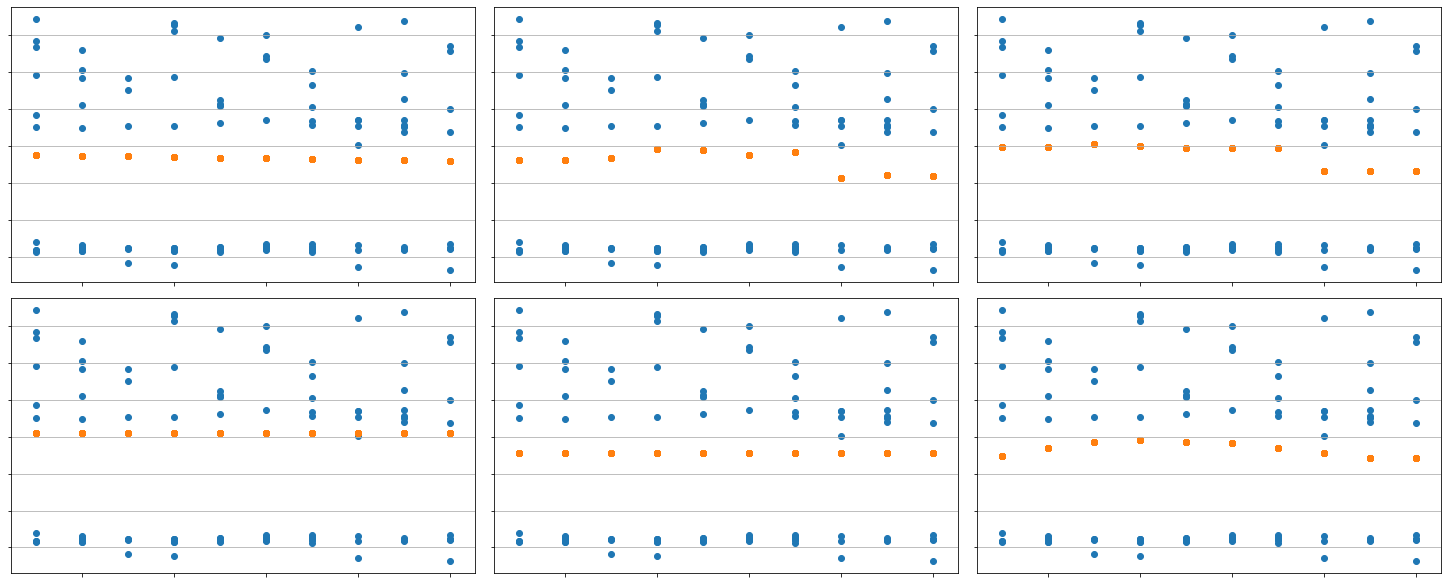

In [7]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize"]
ctx["target_feature"] = "avg_lat_read"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})

hyptertune: start tuning..
(96, 1) (96,)
tune: search failed on model: linear_regression use the default parameters because of: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}
hyptertune: took 0 s


AssertionError: jct 0.0, predicted jct 0.0
exp_name:keySize_linear_1_10_suite_1_var
df:{'memcached':      level_0  index  numServerInstance  numClientInstance serverInstanceType  \
0          0      0                  1                  1          c5.xlarge   
1          1      1                  1                  1          c5.xlarge   
2          2      2                  1                  1          c5.xlarge   
3          3      3                  1                  1          c5.xlarge   
4          4      4                  1                  1          c5.xlarge   
..       ...    ...                ...                ...                ...   
195      195    195                  1                  1          c5.xlarge   
196      196    196                  1                  1          c5.xlarge   
197      197    197                  1                  1          c5.xlarge   
198      198    198                  1                  1          c5.xlarge   
199      199    199                  1                  1          c5.xlarge   

    clientInstanceType  keySize  valueSize  serverThread  clientThread  ...  \
0            c5.xlarge        1        200             4             1  ...   
1            c5.xlarge        1        200             4             1  ...   
2            c5.xlarge        1        200             4             1  ...   
3            c5.xlarge        1        200             4             1  ...   
4            c5.xlarge        1        200             4             1  ...   
..                 ...      ...        ...           ...           ...  ...   
195          c5.xlarge       10        200             4             1  ...   
196          c5.xlarge       10        200             4             1  ...   
197          c5.xlarge       10        200             4             1  ...   
198          c5.xlarge       10        200             4             1  ...   
199          c5.xlarge       10        200             4             1  ...   

     warmupTime  debug  avg_lat_read  std_lat_read min_lat_read 99th_lat_read  \
0             2  False          63.9          13.4         54.8          73.1   
1             2  False         145.3          18.2        129.1         185.4   
2             2  False         130.2          17.5        117.4         155.7   
3             2  False          63.9          10.7         49.8          74.1   
4             2  False         180.1          15.2        156.2         219.5   
..          ...    ...           ...           ...          ...           ...   
195           2  False         140.0          26.5        117.4         180.0   
196           2  False          64.2          10.2         54.8          74.4   
197           2  False          64.2          10.7         54.8          75.5   
198           2  False         130.9           7.7        117.4         155.6   
199           2  False         140.3          14.1        117.4         196.6   

    rx_goodput tx_goodput avg_client_server_lat  tenancy  
0          0.0        0.2                  91.0  default  
1          0.0        0.1                 185.0  default  
2          0.0        0.1                 165.0  default  
3          0.0        0.2                  95.0  default  
4          0.0        0.1                 190.0  default  
..         ...        ...                   ...      ...  
195        0.0        0.1                 176.0  default  
196        0.0        0.2                  96.0  default  
197        0.0        0.2                  98.0  default  
198        0.0        0.1                 164.0  default  
199        0.0        0.1                 181.0  default  

[200 rows x 22 columns]}

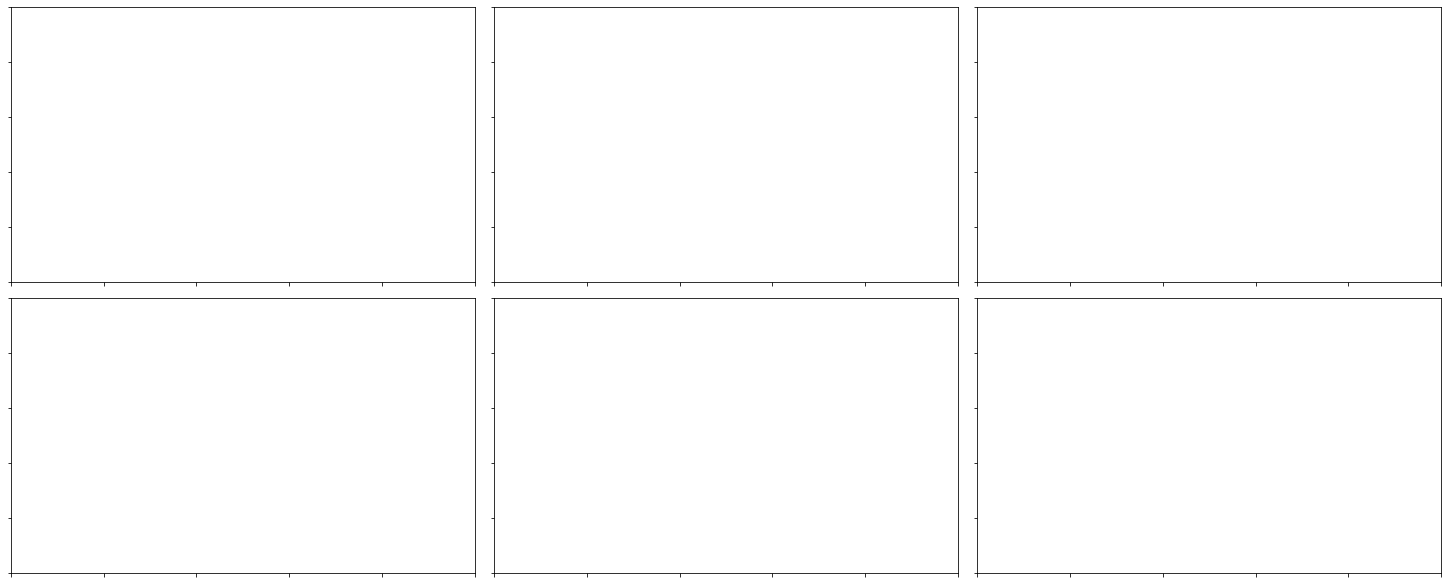

In [8]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize"]
ctx["target_feature"] = "rx_goodput"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
# TODO: no tune
results = dataset_tool.best_case_eval(ctx, {"memcached": df})